3. Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset.
Example – predict sentiments based on product reviews b) Apply for prediction

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2025-04-22 13:55:19.001422: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 13:55:19.001844: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 13:55:19.004131: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 13:55:19.010613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745310319.021253    6810 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745310319.02

In [2]:
# Load dataset with only the top 10,000 most common words
vocab_size = 10000
max_len = 200  # pad or truncate reviews to this length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [3]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5


/home/pl1/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-04-22 13:55:41.903451: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - accuracy: 0.6639 - loss: 0.5919 - val_accuracy: 0.8514 - val_loss: 0.3457
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.8991 - loss: 0.2545 - val_accuracy: 0.8520 - val_loss: 0.3585
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.9293 - loss: 0.1899 - val_accuracy: 0.8770 - val_loss: 0.3124
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - accuracy: 0.9551 - loss: 0.1320 - val_accuracy: 0.8486 - val_loss: 0.3616
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 177ms/step - accuracy: 0.9635 - loss: 0.1098 - val_accuracy: 0.8458 - val_loss: 0.3930


782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8444 - loss: 0.4021
Test Accuracy: 84.44%
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step


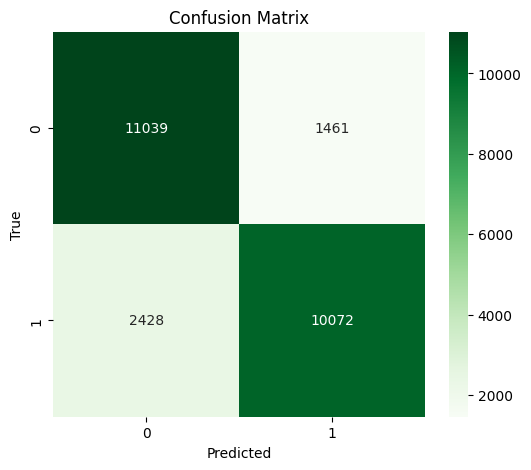

              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85     12500
    Positive       0.87      0.81      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.85      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000



In [4]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))